This notebook was created by Sanjna Mootakoduru and has a corresponding github repository. You can access the repository and the csv file used in this project at the following link: https://github.com/smootakoduru/Linear_Regression_Practice_Mobile-Tablet_Sales/tree/main

#**Linear Regression Practice With a Mobile and Tablet Sales Dataset**

##Goal
Create a Machine Learning model that can forecast sales (in dollars) of mobile phones and tablets given various input features of the Sales.csv dataset.



###**Data Dictionary**


For this project I will be working with the Sales.csv

1. Advertising Expenditure: Amount in dollars spent on advertisements across various marketing channels
2. Campaign Engagement Score: A score computed by the marketing team based on social media campaign engagment such as likes, comments, and shares.
3. Discount Percentage: Average discount offered for a given product
4. Average Customer Rating: Average rating provided by customers for the product
5. Product Price: The price of the product in dollars
6. Return Rate: The average rate of return once the product has been delivered
7. Length of Product Description: Number of words in the description of the product
8. Region: Region where the product is sold (North, South, East, or West)
9. Popularity: The level of popularity of the product (ranges from very low to very high)
10. Sales: Amount of sales (in dollars)



**product refers to a mobile phone or tablet

In [1]:
#loading and manipulating data
import numpy as np
import pandas as pd

#plotting and visualizing data
import seaborn as sns
import matplotlib.pyplot as plt

#model building
from sklearn.model_selection import train_test_split #splitting the data into training and testing sets
from sklearn.linear_model import LinearRegression #building linear regression model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error #checking model performance

To ensure this notebook and its dataset are easily accessible, the data will be loaded directly from GitHub.

In [2]:
url = "https://raw.githubusercontent.com/smootakoduru/Linear_Regression_Practice_Mobile-Tablet_Sales/main/data/Sales.csv"
df = pd.read_csv(url)

##**Plan**


Now that I've loaded the necessary libraries and my dataset, I want to outline my plan for this project. I want to be organized and meticulous in my approach.

**1. Data Sanity Check**
  - Making sure the dataset is in a workable state before I begin analysis
**2. Exploratory Data Analysis**
  - Understanding the dataset.
     - Distributions — histograms or boxplots to see ranges, skewness, and outliers
     - Relationships — scatter plots to see trends between predictors and target
     - Correlation matrix — check Pearson/Spearman correlations or heatmaps
     - Potential transformations - if relationships look nonlinear
     - Outlier inspection — deciding whether extreme values are valid data points or mistakes

**3. Data Preprocessing**
  - Preparing the dataset for the model
    - Feature selection — keeping only relevant predictors to avoid noise
    - Handling missing data — data imputation
    - Encoding categorical variables — one-hot encoding or label encoding
    - Feature scaling — standardization or normalization if needed
    - Splitting into train/test sets

**4. Model Building**
  - The fun part
    - Choose linear regression type — Ordinary Least Squares, Ridge, Lasso, or Elastic Net
    - Fit the model — model fitting
    - Inspect coefficients — interpret β values to understand the impact of each variable
    - Considering interaction terms — sometimes two features together explain more than separately.

**5. Model Evaluation & Comparision**
  - Evaluating model performance and generalizability
    - Predict on test set — y_pred = model.predict(X_test)
    - Metrics:
      - R² score (r2_score) — proportion of variance explained
      - RMSE (Root Mean Squared Error) — scale-sensitive
      - MAE (Mean Absolute Error) — less sensitive to large outliers
      - Residual analysis — plot residuals vs predicted values to check for patterns (patterns can indicate model misspecification)
      
**6. Outcomes and Insights**
  - Turning my results into real world understanding
    - Interpreting coefficients in the real-world context (e.g., "an extra unit in X increases Y by 2.5 on average")
    - Identifying most influential features — which predictors matter most for the target
    - Highlight limitations — e.g., small sample size, multicollinearity, data bias
    - Suggest next steps — more data collection, new features, different models

##**Data Sanity Check**

In [3]:
#creating a copy of the dataset
sales = df.copy()

In [6]:
#checking the first 5 rows of the dataset to get a feel for it
sales.head()

,Advertising Expenditure,Campaign Engagement Score,Discount Percentage,Average Customer Rating,Product Price,Return Rate,Length of Product Description,Region,Popularity,Sales
0,644.049317,54.565531,25.267151,4.604634,1599.575723,2.133580,231.185389,East,High,26246.91291
1,521.483294,46.875226,35.075859,4.358693,1586.464404,1.553437,262.686931,West,Very High,21432.16935
2,540.079510,42.287145,12.618381,4.571018,1301.644856,2.274891,324.347319,South,Very High,22551.92436
3,627.938419,61.825441,31.588445,4.234209,1601.041884,1.035971,447.710984,South,Very High,27792.29446
4,471.149948,31.061512,9.198991,4.816215,1496.734345,3.276840,310.055333,East,Moderate,17354.77148


In [7]:
#checking the shape of the data
sales.shape

(3000, 10)

In [8]:
#checking the dtypes and the non-null counts of each column
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Advertising Expenditure        3000 non-null   float64
 1   Campaign Engagement Score      3000 non-null   float64
 2   Discount Percentage            3000 non-null   float64
 3   Average Customer Rating        3000 non-null   float64
 4   Product Price                  3000 non-null   float64
 5   Return Rate                    3000 non-null   float64
 6   Length of Product Description  3000 non-null   float64
 7   Region                         3000 non-null   object 
 8   Popularity                     3000 non-null   object 
 9   Sales                          3000 non-null   float64
dtypes: float64(8), object(2)
memory usage: 234.5+ KB


It seems like there are no missing values in this dataset.

most of the data is numerical, except for two columns (region, and popularity) which are categorical.

In [9]:
#I want a statistical summary of all of the columns
sales.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Advertising Expenditure,3000.0,NaN,NaN,NaN,607.72715,82.025112,97.25,561.984787,616.116596,666.331853,801.5
Campaign Engagement Score,3000.0,NaN,NaN,NaN,49.456305,13.17129,0.0,40.69753,49.478699,58.150891,98.75
Discount Percentage,3000.0,NaN,NaN,NaN,28.997927,4.700923,0.0,26.222998,29.552853,32.259294,40.54
Average Customer Rating,3000.0,NaN,NaN,NaN,4.408783,0.227823,3.64945,4.251118,4.432254,4.583205,4.87445
Product Price,3000.0,NaN,NaN,NaN,1434.718134,222.832467,9.78,1306.155958,1461.301831,1587.67179,2000.56
Return Rate,3000.0,NaN,NaN,NaN,1.666106,0.900435,0.03372,0.954551,1.537856,2.285394,4.534866
Length of Product Description,3000.0,NaN,NaN,NaN,248.696636,60.800024,42.0,207.076217,249.348398,288.87565,496.0
Region,3000,4,West,848,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Popularity,3000,5,Very High,1170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales,3000.0,NaN,NaN,NaN,23858.638609,3611.74881,3257.595426,21632.968838,24087.129995,26421.772433,34421.42743


###Just a things that immediately stood out to me:
- On average, around $600 has been spent on advertising
- I find it interesting how the minimum product price is \$9.78 and the maximum was \$2000.56. That's quite a range.
- The max campaign enagagement score of 98.75 is also interesting to me.
- The return rate seems fairly low with the maximum being at just under %5.
- The average customer rating also seems fairly high at around 4.4/5.
- The most frequent popularity was 'Very High'


In [10]:
#I want to see what the possible values of the two categorical columns are
print(sales['Popularity'].value_counts())
print('')
print(sales['Region'].value_counts())

Popularity
Very High    1170
High          735
Low           581
Moderate      511
Very Low        3
Name: count, dtype: int64

Region
West     848
East     816
South    717
North    619
Name: count, dtype: int64


In [11]:
#lastly, i want to check for any duplicate values
sales.duplicated().sum()

np.int64(0)

Looks like there are no duplicate values in the data.

##**Exploratory Data Analysis**

In [12]:
#im going to print the columns and datatypes once again to remind myself of the data
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Advertising Expenditure        3000 non-null   float64
 1   Campaign Engagement Score      3000 non-null   float64
 2   Discount Percentage            3000 non-null   float64
 3   Average Customer Rating        3000 non-null   float64
 4   Product Price                  3000 non-null   float64
 5   Return Rate                    3000 non-null   float64
 6   Length of Product Description  3000 non-null   float64
 7   Region                         3000 non-null   object 
 8   Popularity                     3000 non-null   object 
 9   Sales                          3000 non-null   float64
dtypes: float64(8), object(2)
memory usage: 234.5+ KB


###**Univariate Analysis**

In [13]:
num_data = sales.select_dtypes(include=np.number).columns.tolist()
cat_data = sales.select_dtypes(exclude=np.number).columns.tolist()

print(num_data)
print(cat_data)

['Advertising Expenditure', 'Campaign Engagement Score', 'Discount Percentage', 'Average Customer Rating', 'Product Price', 'Return Rate', 'Length of Product Description', 'Sales']
['Region', 'Popularity']


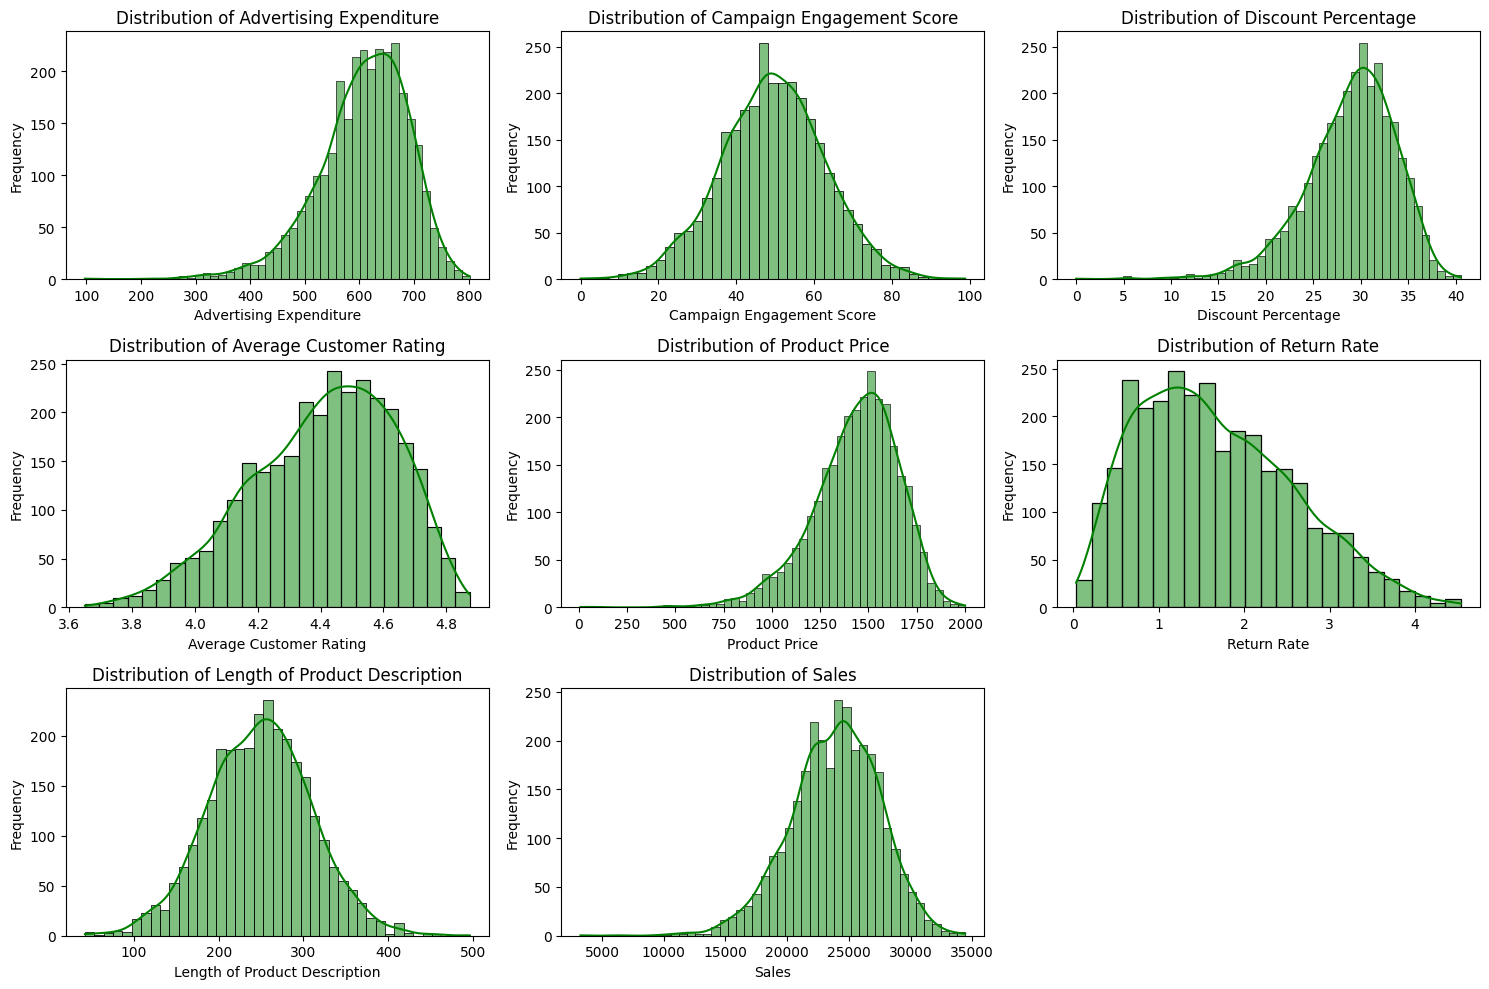

In [14]:
#let's create histograms of every numerical variable

plt.figure(figsize=(15,10))

for i, feature in enumerate(num_data):
  plt.subplot(3,3,i+1)
  sns.histplot(data=sales, x=feature, kde=True, color='green')
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frequency')

plt.tight_layout() #adding spacing between plots
plt.show()

It seems that Advertising Expenditure, Discount Percentage, Average Customer Rating, and Price all have **left-skewed distributions**.

Return rate has a **right-skewed distribution.**

Campaign Engagement Score and Length of Product Description seem to be relatively **normally distributed.**

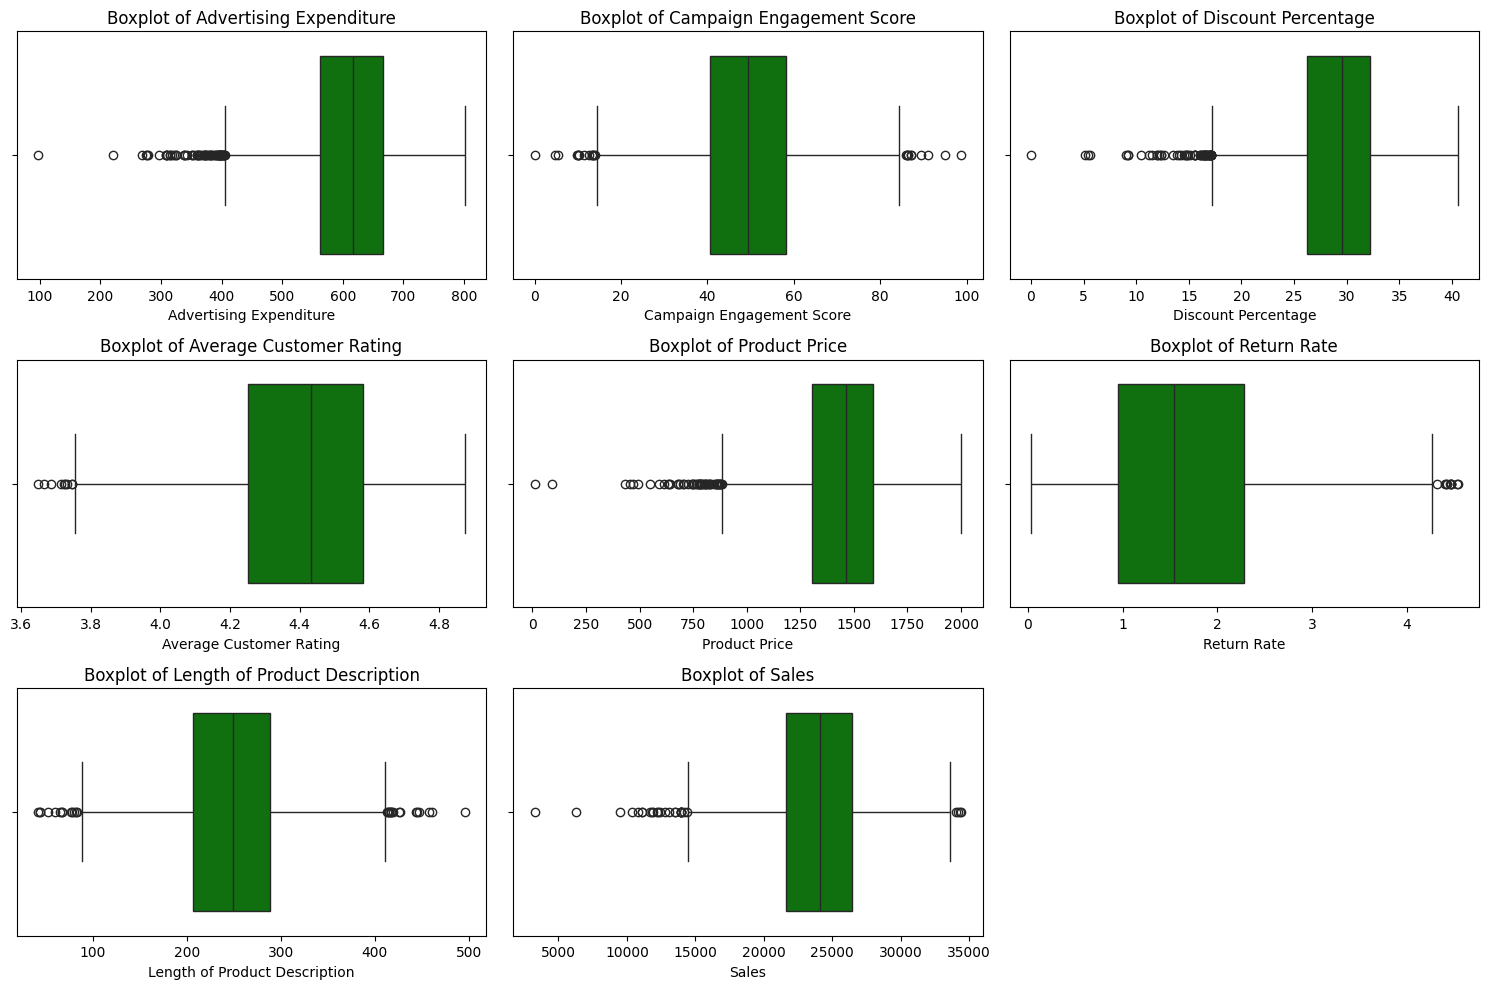

In [15]:
#now I'll make boxplots for each feature

plt.figure(figsize=(15,10))

for i, feature in enumerate(num_data):
  plt.subplot(3,3,i+1)
  sns.boxplot(data=sales, x=feature, color='green');
  plt.title(f'Boxplot of {feature}')
  plt.xlabel(feature)

plt.tight_layout() #adding spacing between plots
plt.show()

The boxplots naturally confirm the findings on distribution from the histograms.

It's also evident that there are outliers in every column.

/tmp/ipython-input-3563543335.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sales, x=feature, palette='gist_earth')


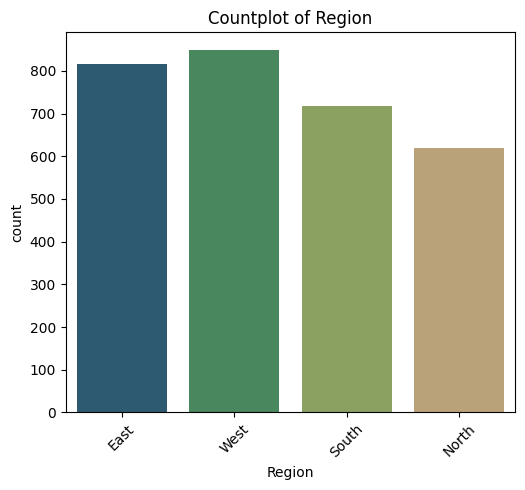

/tmp/ipython-input-3563543335.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sales, x=feature, palette='gist_earth')


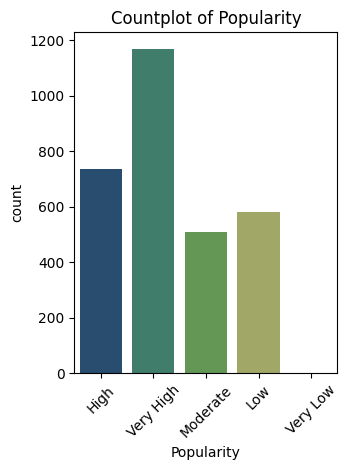

In [16]:
#now i'll make countplots of the categorical values
plt.figure(figsize=(10,5))

for i, feature in enumerate(cat_data):
  plt.subplot(1,2,i+1)
  sns.countplot(data=sales, x=feature, palette='gist_earth')
  plt.title(f'Countplot of {feature}')
  plt.xlabel(feature)
  plt.xticks(rotation=45)

  plt.tight_layout()
  plt.show()

The most frequent region is West, and the least frequnt is North.

The most frequent popularity is 'Very High' and the least frequent is 'Very Low'.

In [17]:
#I just wanted to check how many values are the 'Very Low'
sales[sales['Popularity']=='Very Low']

,Advertising Expenditure,Campaign Engagement Score,Discount Percentage,Average Customer Rating,Product Price,Return Rate,Length of Product Description,Region,Popularity,Sales
1208,673.315253,59.927423,29.908455,3.684753,1585.760437,4.009960,227.653235,West,Very Low,18124.74884
1639,574.539022,47.585863,28.348410,3.665261,1456.306257,3.584759,197.513064,North,Very Low,16302.27607
2117,669.640569,42.731638,33.865801,3.649450,1363.217406,4.468819,253.956344,West,Very Low,21689.99859


###**Bivariate Analysis**

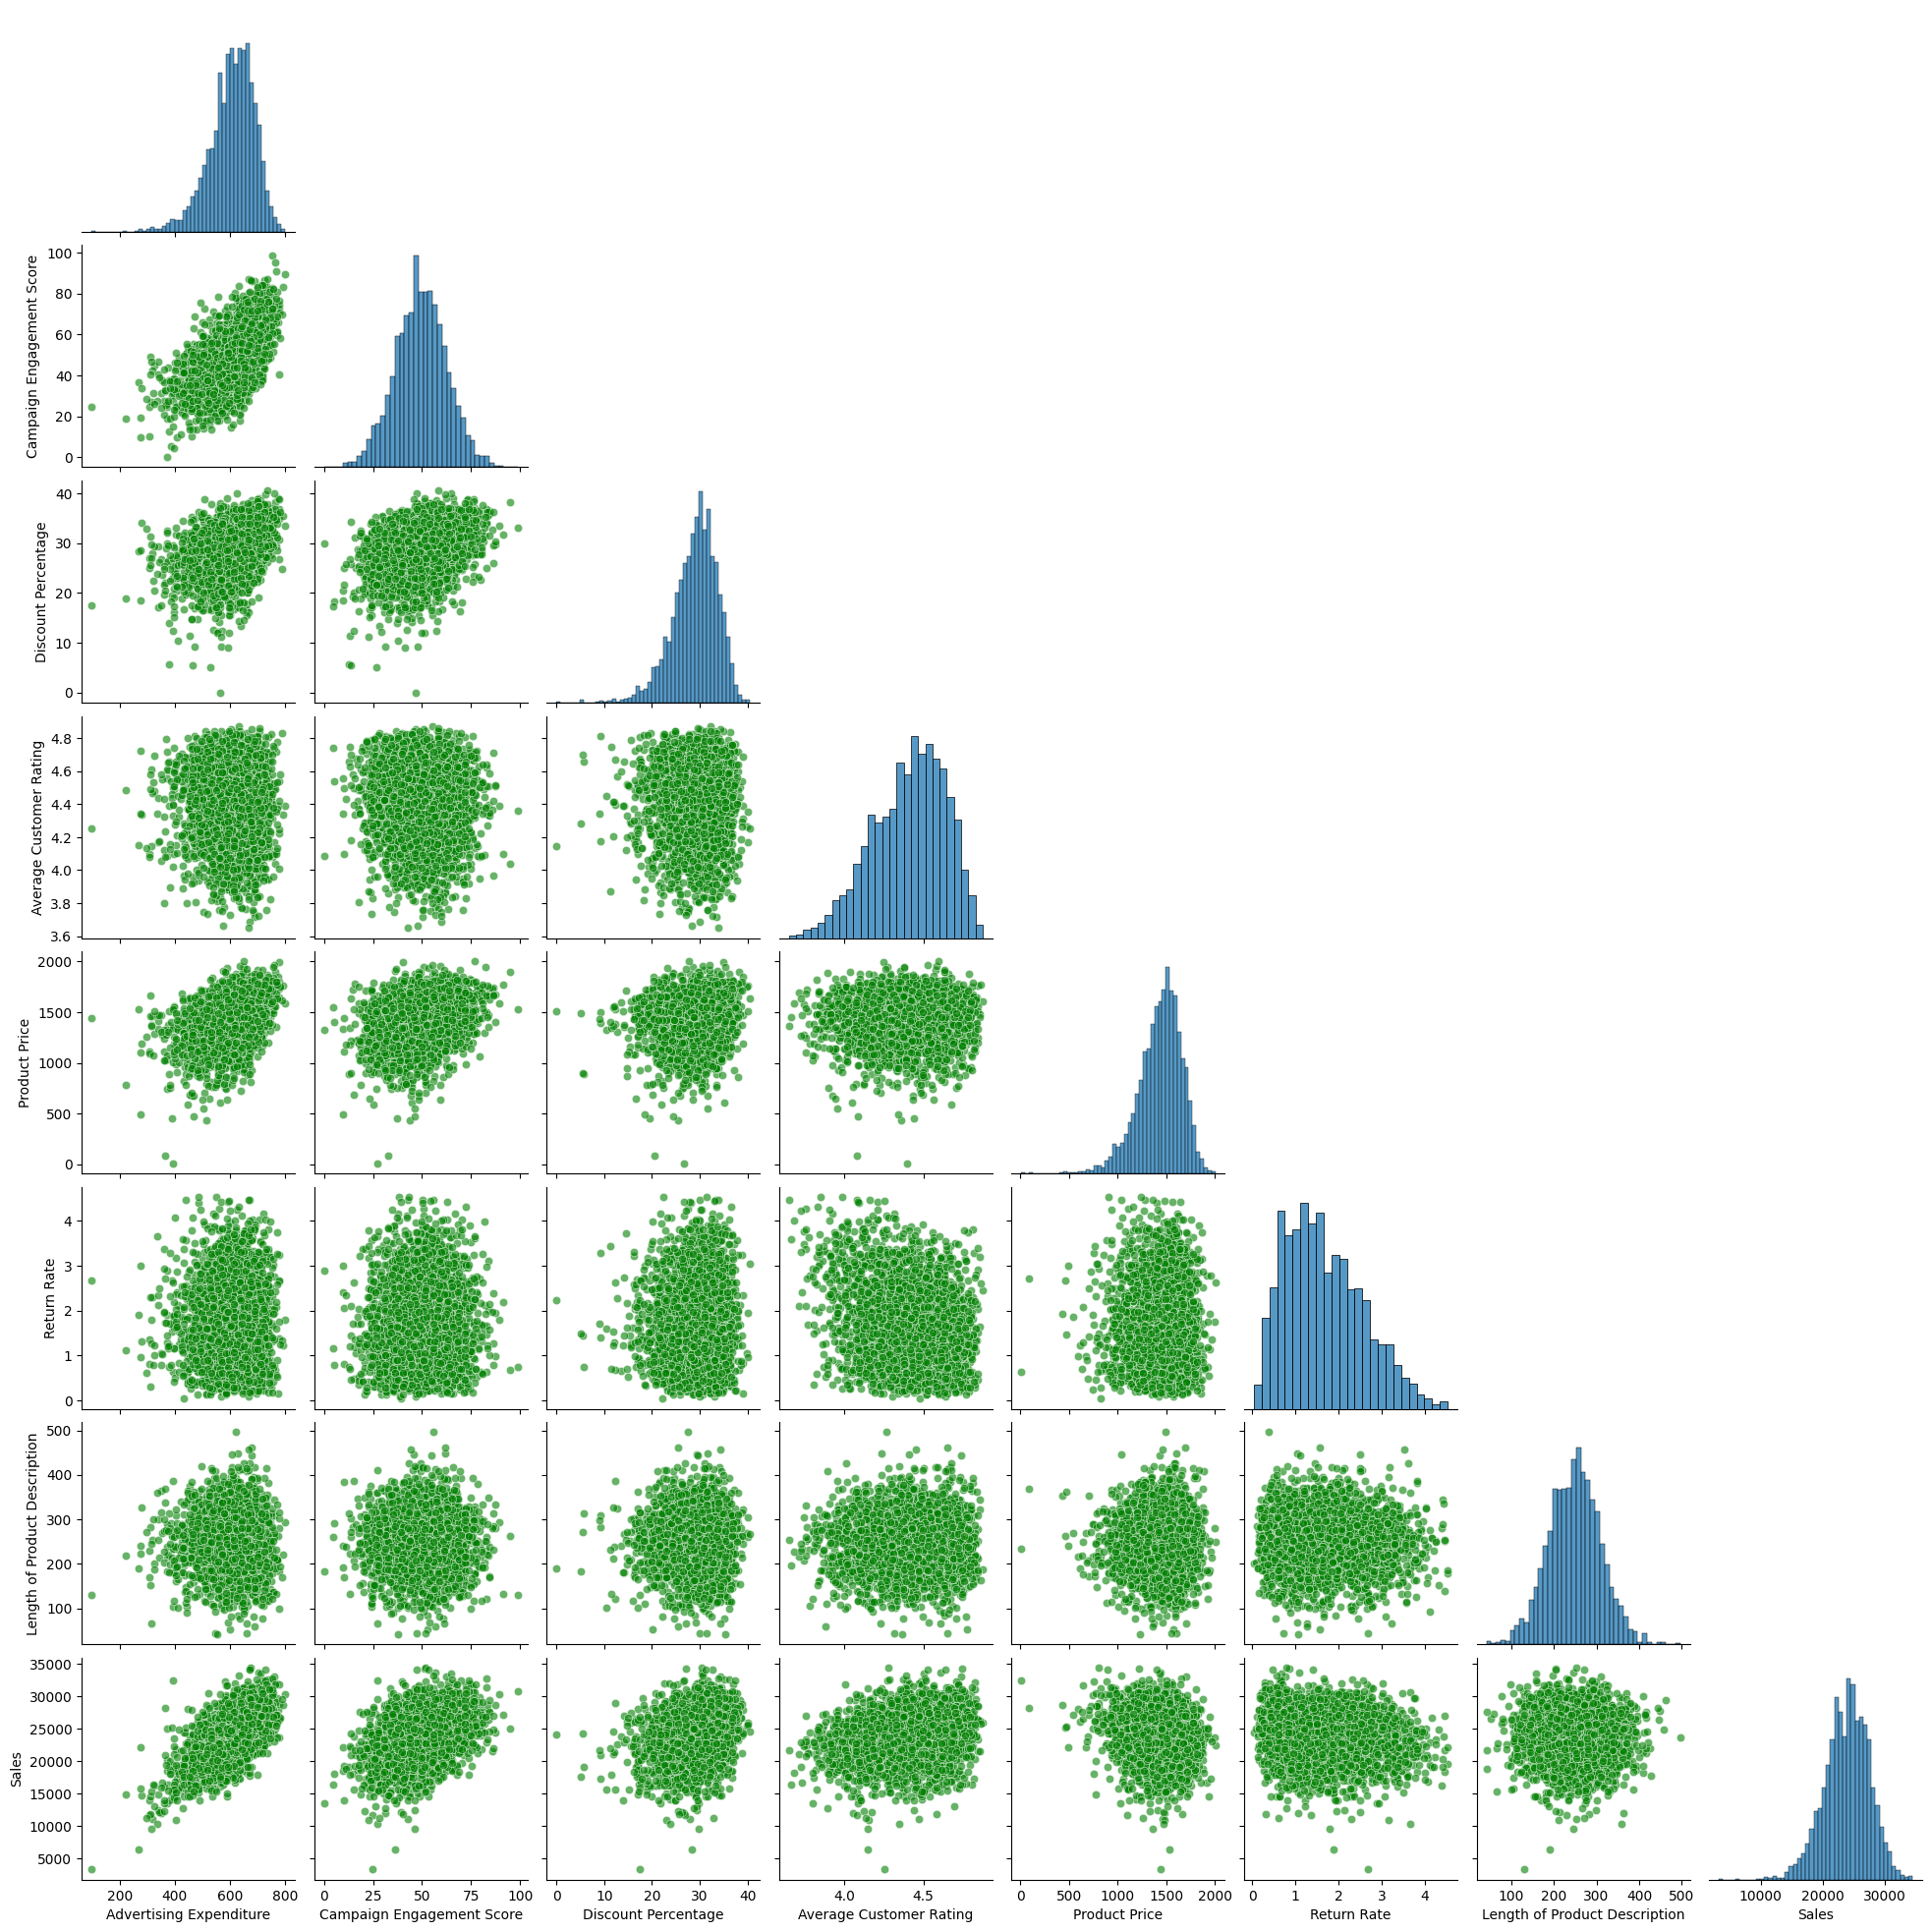

In [18]:
#lets create a pairplot to see how each attribute of the data correlated with one another
sns.pairplot(sales, corner=True, plot_kws={'color': 'green', 'alpha': 0.6});
plt.show()

What's important here is the last row which shows Sales, versus every other numerical attribute of the dataset.

Advertising Expenditure, Campaign Engagement Score seem positively correlated with Sales.

Product Price may be slightly negatively correlated with Sales.

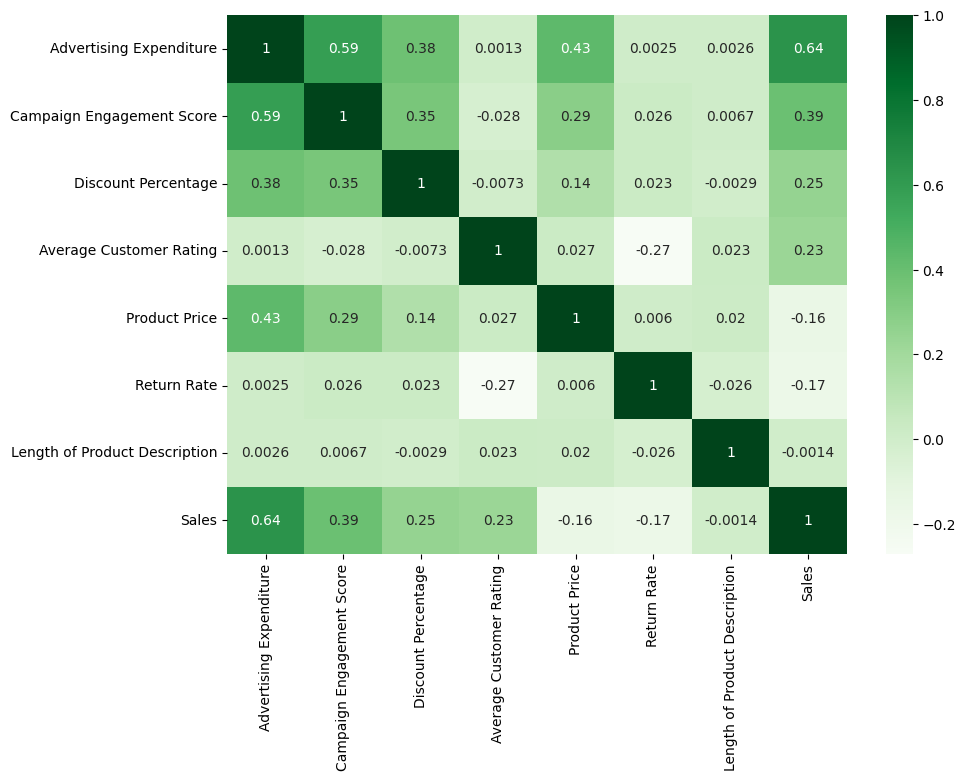

In [19]:
#let's create a heatmap to visualize the correlation matrix

plt.figure(figsize=(10,7))
sns.heatmap(sales.corr(numeric_only=True), annot=True, cmap='Greens');
plt.show()

- Sales does seem moderately positively correlated with Advertising Expenditure. Advertising Expenditure is the greatest correlated attribute with sales.

- Sales is negatively correlated with Product Price and Return Rate, but the correlation is pretty low.

- Advertising Expenditure and Campaign Engagement Score are positively correlated.

- Return Rate and Average Customer Rating seem to be negatively correlated.

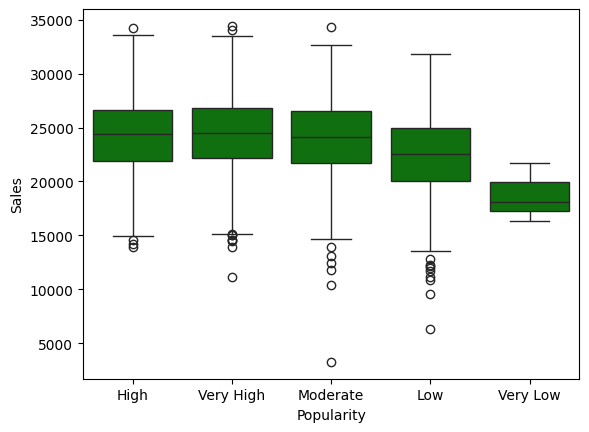

In [20]:
#now I'll see how Sales and Popularity relate to one another
sns.boxplot(data=sales, x='Popularity', y='Sales', color='green');

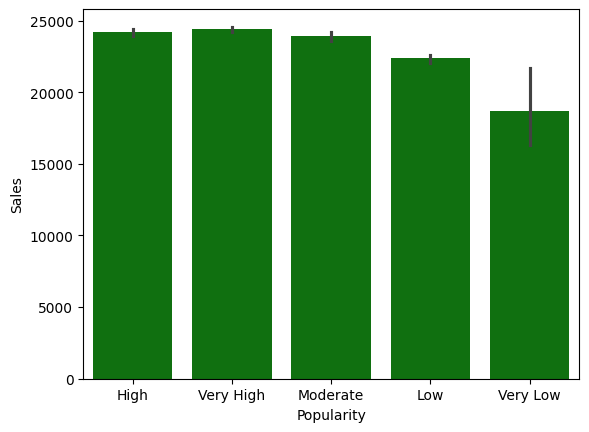

In [21]:
sns.barplot(data=sales, x='Popularity', y='Sales', color='green');

Products rated 'Very Low' have lower sales.

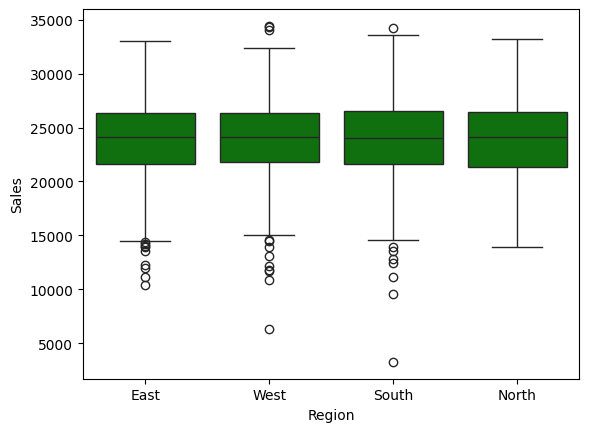

In [22]:
#let's see how Sales and Regions relate
sns.boxplot(data=sales, x='Region', y='Sales', color='green');

Sales seem pretty uniform across each region.

##**Data Preparation for Modeling**

In [23]:
#let's define the explanatory (independent) and response (dependent) variables

X = sales.drop('Sales', axis=1) #independent variables, aka variables we will use to predict sales
y = sales['Sales'] #dependent var, aka the variable we are trying to predict

In [24]:
#let's create our train and test splits

X_train, X_test, y_train, y_test = train_test_split(
    X, #this specifies independent variables
    y, #specifies dependent variable
    test_size=0.20, #specifies the size of the test set as a fraction of all the data
    random_state=42 #specifies the random seed, still allows for reproducible results
)


##**Model Building**

###**Simple Linear Regression**

####**Sales v. Advertising Expenditure**

In [25]:
#defining the independent var
i_var1 = ['Advertising Expenditure']

In [26]:
#creating an instance of the linear regression model
lin_reg1 = LinearRegression()

#fitting the model to the training data
lin_reg1.fit(X_train[i_var1], y_train)

#once the above line of code is run, the coefficient will exist in the linear regression object


LinearRegression()

In [27]:
#let's print the coefficients
print(
    "Slope:", lin_reg1.coef_,
    "Intercept:", lin_reg1.intercept_,
)

Slope: [28.66748755] Intercept: 6435.891302271037


In [28]:
#let's use the coefficients to print the lin reg equation

print(
    'Sales =',
    '(', lin_reg1.coef_[0], ') *', i_var1[0],
    '+', lin_reg1.intercept_,
)

Sales = ( 28.667487552010233 ) * Advertising Expenditure + 6435.891302271037


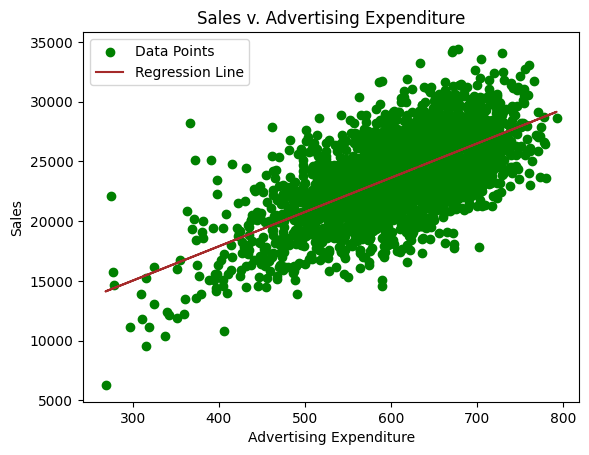

In [29]:
#so we now have our line of best fit. let's see what it looks like against the data

fitted_vals1 = lin_reg1.predict(X_train[i_var1])

#let's plot the scatterplot and regression line
plt.scatter(X_train[i_var1], y_train, color='green', label='Data Points')
plt.plot(X_train[i_var1], fitted_vals1, color='brown', label='Regression Line')
plt.xlabel(i_var1[0])
plt.ylabel('Sales')
plt.title('Sales v. Advertising Expenditure')
plt.legend()
plt.show()

####**Sales v. Discount Percentage**

Let's do the whole thing over for a different relationship.

In [30]:
i_var2 = ['Discount Percentage']

In [31]:
lin_reg2 = LinearRegression()

lin_reg2.fit(X_train[i_var2], y_train)

LinearRegression()

In [32]:
print(
    "Slope:", lin_reg2.coef_,
    "Intercept:", lin_reg2.intercept_,
)

Slope: [188.3855554] Intercept: 18411.681879531294


In [33]:
# printing the linear regression equation
print(
    "Sales =",
    "(", lin_reg2.coef_[0], ")", "*", i_var2[0],
    "+", lin_reg2.intercept_,
)

Sales = ( 188.3855554032925 ) * Discount Percentage + 18411.681879531294


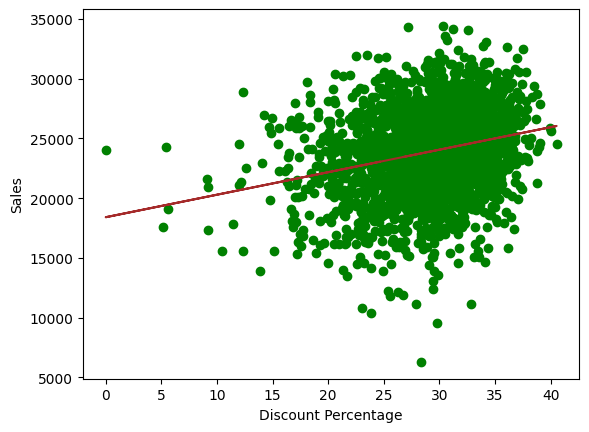

In [34]:
fitted_values2 = lin_reg2.predict(X_train[i_var2])

plt.scatter(X_train[i_var2], y_train, color='green')
plt.plot(X_train[i_var2], fitted_values2, color='brown')
plt.xlabel(i_var2[0])
plt.ylabel('Sales')
plt.show()

####**Sales v. Product Price**

In [35]:
i_var3 = ['Product Price']

In [36]:
lin_reg3 = LinearRegression()

lin_reg3.fit(X_train[i_var3], y_train)

LinearRegression()

In [37]:
print(
    "Slope:", lin_reg3.coef_,
    "Intercept:", lin_reg3.intercept_,
)

Slope: [-2.53923205] Intercept: 27522.91607345547


In [38]:
print(
    "Sales =",
    "(", lin_reg3.coef_[0], ")", "*", i_var3[0],
    "+", lin_reg3.intercept_,
)

Sales = ( -2.539232052840615 ) * Product Price + 27522.91607345547


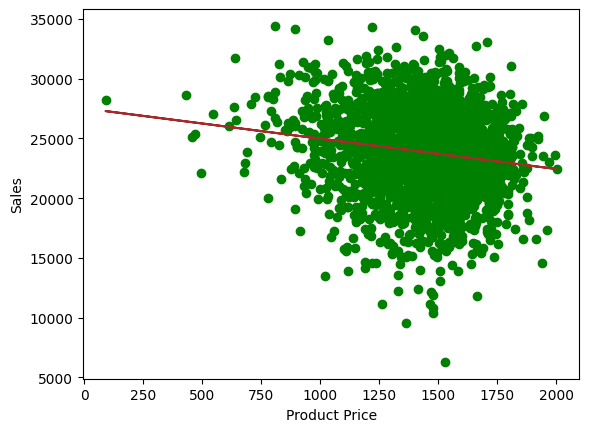

In [39]:
# plotting the best-fit line
fitted_values3 = lin_reg3.predict(X_train[i_var3])

# Plot the scatterplot and regression line
plt.scatter(X_train[i_var3], y_train, color='green')
plt.plot(X_train[i_var3], fitted_values3, color='brown')
plt.xlabel(i_var3[0])
plt.ylabel('Sales')
plt.show()

###**Multipe Linear Regression**

####**Sales v. Advertising Expenditure, Discount Percentage**

In [40]:
i_var4 = ['Advertising Expenditure', 'Discount Percentage']

In [41]:
lin_reg4 = LinearRegression()

lin_reg4.fit(X_train[i_var4], y_train)

LinearRegression()

In [42]:
print(
    "Coefficients:", lin_reg4.coef_, lin_reg4.intercept_
)

Coefficients: [28.70843207 -1.80363464] 6463.321146716942


In [43]:
print(
    "Sales =",
    "(", lin_reg4.coef_[0], ")", "*", i_var4[0],
    "+ (", lin_reg4.coef_[1], ")", "*", i_var4[1],
    "+", lin_reg4.intercept_,
)

Sales = ( 28.708432074450347 ) * Advertising Expenditure + ( -1.8036346364589904 ) * Discount Percentage + 6463.321146716942


####**Sales v. Advertising Expenditure, Discount Percentage, Product Price**

In [44]:
i_var5 = ['Advertising Expenditure', 'Discount Percentage', 'Product Price']

In [45]:
lin_reg5 = LinearRegression()

lin_reg5.fit(X_train[i_var5], y_train)

LinearRegression()

In [46]:
print(
    'Slope:', lin_reg5.coef_,
    'Intercept:', lin_reg5.intercept_
)

Slope: [38.43656519 -3.57483935 -8.4559953 ] Intercept: 12731.131575406755


In [47]:
print(
    "Sales =",
    "(", lin_reg5.coef_[0], ")", "*", i_var5[0],
    "+ (", lin_reg5.coef_[1], ")", "*", i_var5[1],
    "+ (", lin_reg5.coef_[2], ")", "*", i_var5[2],
    "+", lin_reg5.intercept_,
)

Sales = ( 38.43656519116551 ) * Advertising Expenditure + ( -3.5748393468180044 ) * Discount Percentage + ( -8.455995295705076 ) * Product Price + 12731.131575406755


####**Sales v. Advertising Expenditure, Discount Percentage, Product Price, Popularity**

Now I'll add a categorical variable, popularity.

* in order for this to work, I'll have to encode the popularity column

In [48]:
#defining the label encoding
lab_enc = {
    'Very Low':1,
    'Low': 2,
    'Moderate': 3,
    'High': 4,
    'Very High': 5,
}

In [49]:
# Revert 'Popularity' to original string values from the original 'sales' DataFrame
X['Popularity'] = sales['Popularity']

# Now, change the popularity column using the encoded values
X['Popularity'] = X['Popularity'].map(
    lambda x: lab_enc[x]
)

X.head()

,Advertising Expenditure,Campaign Engagement Score,Discount Percentage,Average Customer Rating,Product Price,Return Rate,Length of Product Description,Region,Popularity
0,644.049317,54.565531,25.267151,4.604634,1599.575723,2.133580,231.185389,East,4
1,521.483294,46.875226,35.075859,4.358693,1586.464404,1.553437,262.686931,West,5
2,540.079510,42.287145,12.618381,4.571018,1301.644856,2.274891,324.347319,South,5
3,627.938419,61.825441,31.588445,4.234209,1601.041884,1.035971,447.710984,South,5
4,471.149948,31.061512,9.198991,4.816215,1496.734345,3.276840,310.055333,East,3


In [50]:
#i'll split the new data 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42
)

In [51]:
#now i'll define the independent vars
i_var6 = ['Advertising Expenditure', 'Discount Percentage', 'Product Price', 'Popularity']

In [52]:
lin_reg6 = LinearRegression()

lin_reg6.fit(X_train[i_var6], y_train)

LinearRegression()

In [53]:
# printing the linear regression coefficients
print(
    "Coefficients:", lin_reg6.coef_, lin_reg6.intercept_
)

Coefficients: [ 38.29568342  -1.58779804  -8.51597761 542.69784813] 10758.596248519574


In [54]:
print(
    "Sales =",
    "(", lin_reg6.coef_[0], ")", "*", i_var6[0],
    "+ (", lin_reg6.coef_[1], ")", "*", i_var6[1],
    "+ (", lin_reg6.coef_[2], ")", "*", i_var6[2],
    "+ (", lin_reg6.coef_[3], ")", "*", i_var6[3],
    "+", lin_reg6.intercept_,
)

Sales = ( 38.295683415534135 ) * Advertising Expenditure + ( -1.5877980394796403 ) * Discount Percentage + ( -8.515977612063976 ) * Product Price + ( 542.6978481319416 ) * Popularity + 10758.596248519574


####**Sales v. All Independent Variables**

The Region column has yet to be encoded in our dataset, so first we will have to do that.

In [55]:
#creating one-hot encoded/dummy variables
X = pd.get_dummies(
    X, #defines the datafram to fetch data from
    columns = X.select_dtypes(include=['object','category']).columns.tolist(),
    drop_first = True # dropping the first dummy column, saves one column of space
)

# specifying the dtype od the independent variables df
X = X.astype(float)

X.head()

,Advertising Expenditure,Campaign Engagement Score,Discount Percentage,Average Customer Rating,Product Price,Return Rate,Length of Product Description,Popularity,Region_North,Region_South,Region_West
0,644.049317,54.565531,25.267151,4.604634,1599.575723,2.133580,231.185389,4.0,0.0,0.0,0.0
1,521.483294,46.875226,35.075859,4.358693,1586.464404,1.553437,262.686931,5.0,0.0,0.0,1.0
2,540.079510,42.287145,12.618381,4.571018,1301.644856,2.274891,324.347319,5.0,0.0,1.0,0.0
3,627.938419,61.825441,31.588445,4.234209,1601.041884,1.035971,447.710984,5.0,0.0,1.0,0.0
4,471.149948,31.061512,9.198991,4.816215,1496.734345,3.276840,310.055333,3.0,0.0,0.0,0.0


In [56]:
# splitting the data in 80:20 ratio for train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,    # specifying the independent variables
    y,    # specifying the dependent variable
    test_size=0.20,    # specifying the size of the test set as a fraction of the whole data
    random_state=42    # specifying a seed value to enable reproducible results
)

In [57]:
lin_reg7 = LinearRegression()

lin_reg7.fit(X_train, y_train)

LinearRegression()

In [58]:
print(
    "Coefficients:", lin_reg7.coef_, lin_reg7.intercept_
)

Coefficients: [ 3.68003768e+01  2.07776337e+01 -6.91846629e+00  2.89027810e+03
 -8.67003378e+00 -4.44787734e+02 -5.08833857e-02  1.46842283e+02
 -6.98114448e+00  5.28817618e+01  1.89167361e+02] 469.5990299012665


In [59]:
#printing the linear regression equation
equation = "Sales = ( " + str(lin_reg7.coef_[0]) + " ) * " + X_train.columns.tolist()[0]

for i in range(1, lin_reg7.coef_.shape[0]):
    equation += " + ( " + str(lin_reg7.coef_[i]) + " ) * " + X_train.columns.tolist()[i]

equation +=  " + " + str(lin_reg7.intercept_)

print(equation)

Sales = ( 36.80037684442129 ) * Advertising Expenditure + ( 20.777633698251684 ) * Campaign Engagement Score + ( -6.918466291297645 ) * Discount Percentage + ( 2890.27810151582 ) * Average Customer Rating + ( -8.670033784471654 ) * Product Price + ( -444.7877341802202 ) * Return Rate + ( -0.05088338568230606 ) * Length of Product Description + ( 146.84228310853374 ) * Popularity + ( -6.981144476912429 ) * Region_North + ( 52.88176184795629 ) * Region_South + ( 189.16736137256444 ) * Region_West + 469.5990299012665


##**Model Performance Evaluation**

Now it's time to see how the models performed. To do this, we can use MAPE, Adjusted R2 and other metrics.

In [60]:
#function to compute MAPE
def mape_score(targets, predictions):
  return np.mean(np.abs(targets - predictions) / targets) *100

#function to commpute adjusted r2
def adj_r2_score(predictors, targets, predictions):
  r2 = r2_score(targets, predictions)
  n = predictors.shape[0]
  k = predictors.shape[1]
  return 1 - ((1-r2)*(n-1)/(n-k-1))

#func to compute diff metrics to check the performance of a regression model
def model_performance(model, predictors, targets):
    """
    Function to compute different metrics to check regression model performance

    model: regression model
    predictors: independent variables
    target: dependent variable
    """

    #predicting using the independent variables
    pred = model.predict(predictors)

    rmse = np.sqrt(mean_squared_error(targets, pred))
    mae = mean_absolute_error(targets, pred)
    mape = mape_score(targets, pred)
    r2 = r2_score(targets, pred)
    adj_r2 = adj_r2_score(predictors, targets, pred)

    #creating dataframe of metrics
    df_perf = pd.DataFrame(
        {
        "RMSE": rmse,
        "MAE": mae,
        "MAPE": mape,
        "R2": r2,
        "Adj R2": adj_r2
        },
        index=[0],
    )

    return df_perf


Now I can evaluate all of the models I've built so far.

####**Sales v. Advertising Expenditure**

In [61]:
lin_reg1_train_perf = model_performance(lin_reg1, X_train[i_var1], y_train)
lin_reg1_train_perf

,RMSE,MAE,MAPE,R2,Adj R2
0,2753.419094,2207.551603,9.647262,0.415783,0.415539


In [62]:
lin_reg1_test_perf = model_performance(lin_reg1, X_test[i_var1], y_test)
lin_reg1_test_perf

,RMSE,MAE,MAPE,R2,Adj R2
0,2857.307226,2226.476254,9.96158,0.385518,0.38449


This shows that the model has significant power. A**dvertising Expenditure explains around 38-42% of the variation in Sales**.

There is **no major overfitting**, the gap between the adjusted R2s is only around 4%. The **model seems to generalize well**.




####**Sales v. Discount Percentage**

In [63]:
lin_reg2_train_perf = model_performance(lin_reg2, X_train[i_var2], y_train)
lin_reg2_train_perf

,RMSE,MAE,MAPE,R2,Adj R2
0,3489.766337,2761.85512,12.464781,0.061525,0.061134


In [64]:
lin_reg2_test_perf = model_performance(lin_reg2, X_test[i_var2], y_test)
lin_reg2_test_perf

,RMSE,MAE,MAPE,R2,Adj R2
0,3524.541373,2797.50262,13.334384,0.065023,0.06346


The model seems to **generalize well** in this case too.

Discount Percentage accounts for around **6%** of the variation in Sales.

####**Sales v. Product Price**

In [65]:
lin_reg3_train_perf = model_performance(lin_reg3, X_train[i_var3], y_train)
lin_reg3_train_perf

,RMSE,MAE,MAPE,R2,Adj R2
0,3558.436048,2816.479842,12.759044,0.024228,0.023821


In [66]:
lin_reg3_test_perf = model_performance(lin_reg3, X_test[i_var3], y_test)
lin_reg3_test_perf

,RMSE,MAE,MAPE,R2,Adj R2
0,3601.594159,2843.696093,13.700047,0.023696,0.022063


####**Sales v. Advertising Expenditure, Discount Percentage**

In [67]:
lin_reg4_train_perf = model_performance(lin_reg4, X_train[i_var4], y_train)
lin_reg4_train_perf

,RMSE,MAE,MAPE,R2,Adj R2
0,2753.407802,2207.640909,9.64753,0.415787,0.4153


In [68]:
lin_reg4_test_perf = model_performance(lin_reg4, X_test[i_var4], y_test)
lin_reg4_test_perf

,RMSE,MAE,MAPE,R2,Adj R2
0,2857.608291,2226.948004,9.96336,0.385388,0.383329


####**Sales v. Advertising Expenditure, Discount Percentage, Product Price**


In [69]:
lin_reg5_train_perf = model_performance(lin_reg5, X_train[i_var5], y_train)
lin_reg5_train_perf

,RMSE,MAE,MAPE,R2,Adj R2
0,2170.436447,1757.487072,7.641589,0.636985,0.636531


In [70]:
lin_reg5_test_perf = model_performance(lin_reg5, X_test[i_var5], y_test)
lin_reg5_test_perf

,RMSE,MAE,MAPE,R2,Adj R2
0,2179.437285,1740.589014,7.657319,0.642493,0.640694


####**Sales v. Advertising Expenditure, Discount Percentage, Product Price, Popularity**


In [71]:
lin_reg6_train_perf = model_performance(lin_reg6, X_train[i_var6], y_train)
lin_reg6_train_perf

,RMSE,MAE,MAPE,R2,Adj R2
0,2079.919471,1680.33272,7.286114,0.666633,0.666076


In [72]:
lin_reg6_test_perf = model_performance(lin_reg6, X_test[i_var6], y_test)
lin_reg6_test_perf

,RMSE,MAE,MAPE,R2,Adj R2
0,2047.484172,1639.883732,7.15333,0.684473,0.682352


####**Sales v. All Independent Variales**


In [73]:
lin_reg7_train_perf = model_performance(lin_reg7, X_train, y_train)
lin_reg7_train_perf

,RMSE,MAE,MAPE,R2,Adj R2
0,1940.930335,1564.829605,6.785088,0.709698,0.708361


In [74]:
lin_reg7_test_perf = model_performance(lin_reg7, X_test, y_test)
lin_reg7_test_perf

,RMSE,MAE,MAPE,R2,Adj R2
0,1907.839718,1558.392467,6.763019,0.726045,0.72092


All together, the independent variables explain 70-72% of the variation in Sales.

##**Model Performance Comparision**

Now we must compare all of the models we've built.

Let's start with comparing the training performance.

In [75]:
#training performance comparison

#concatenating all the training performance dataframes
models_train_comp_df = pd.concat(
    [
        lin_reg1_train_perf.T,
        lin_reg2_train_perf.T,
        lin_reg3_train_perf.T,
        lin_reg4_train_perf.T,
        lin_reg5_train_perf.T,
        lin_reg6_train_perf.T,
        lin_reg7_train_perf.T,
    ],
    axis=1,
)

#efining the list of models built
models_train_comp_df.columns = [
    "Simple Linear Regression - Sales vs Advertising Expenditure",
    "Simple Linear Regression - Sales vs Discount Percentage",
    "Simple Linear Regression - Sales vs Product Price",
    "Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage",
    "Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage, Product Price",
    "Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage, Product Price, Popularity",
    "Multiple Linear Regression - Sales vs All independent variables",
]

print("Training performance comparison:")
models_train_comp_df.T

Training performance comparison:


,RMSE,MAE,MAPE,R2,Adj R2
Simple Linear Regression - Sales vs Advertising Expenditure,2753.419094,2207.551603,9.647262,0.415783,0.415539
Simple Linear Regression - Sales vs Discount Percentage,3489.766337,2761.855120,12.464781,0.061525,0.061134
Simple Linear Regression - Sales vs Product Price,3558.436048,2816.479842,12.759044,0.024228,0.023821
"Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage",2753.407802,2207.640909,9.647530,0.415787,0.415300
"Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage, Product Price",2170.436447,1757.487072,7.641589,0.636985,0.636531
"Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage, Product Price, Popularity",2079.919471,1680.332720,7.286114,0.666633,0.666076
Multiple Linear Regression - Sales vs All independent variables,1940.930335,1564.829605,6.785088,0.709698,0.708361


Now lt's compare testing performance.

In [76]:
#test performance comparison

#concatenating all the test performance dataframes
models_test_comp_df = pd.concat(
    [
        lin_reg1_test_perf.T,
        lin_reg2_test_perf.T,
        lin_reg3_test_perf.T,
        lin_reg4_test_perf.T,
        lin_reg5_test_perf.T,
        lin_reg6_test_perf.T,
        lin_reg7_test_perf.T,
    ],
    axis=1,
)

#defining the list of models built
models_test_comp_df.columns = [
    "Simple Linear Regression - Sales vs Advertising Expenditure",
    "Simple Linear Regression - Sales vs Discount Percentage",
    "Simple Linear Regression - Sales vs Product Price",
    "Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage",
    "Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage, Product Price",
    "Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage, Product Price, Popularity",
    "Multiple Linear Regression - Sales vs All independent variables",
]

print("Test performance comparison:")
models_test_comp_df.T

Test performance comparison:


,RMSE,MAE,MAPE,R2,Adj R2
Simple Linear Regression - Sales vs Advertising Expenditure,2857.307226,2226.476254,9.961580,0.385518,0.384490
Simple Linear Regression - Sales vs Discount Percentage,3524.541373,2797.502620,13.334384,0.065023,0.063460
Simple Linear Regression - Sales vs Product Price,3601.594159,2843.696093,13.700047,0.023696,0.022063
"Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage",2857.608291,2226.948004,9.963360,0.385388,0.383329
"Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage, Product Price",2179.437285,1740.589014,7.657319,0.642493,0.640694
"Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage, Product Price, Popularity",2047.484172,1639.883732,7.153330,0.684473,0.682352
Multiple Linear Regression - Sales vs All independent variables,1907.839718,1558.392467,6.763019,0.726045,0.720920


##**Outcomes and Insights**

Here's what I've learned!

####**1. Advertising Expenditure seems to be a good predictor of Sales**

- In Simple Linear Regression (first row), Advertising Expenditure gives an R² ≈ 0.416 (train) and 0.386 (test).

- This means it explains ~38-42% of the variance in sales on its own — much higher than the other single predictors.

- The RMSE (\~\$2,753 train / $2,857 test) and MAPE (\~9.6-9.9%) are also reasonable for a single predictor, and the small train-test difference shows good generalization.



**Implication**: Advertising spend is strongly correlated with sales, more so than price or discount individually, and it works well even in a simple model.

####**2. Discount Percentage and Product Price are individually poor predictors of Sales, but improve performance when combined with Advertising Expenditure**

- Individually:

  - Discount Percentage: R² is only 0.0615 (train) and 0.0650 (test) - basically explains almost none of the variance.

  - Product Price: Even lower R² (~0.02–0.024), suggesting minimal predictive value alone.

- When combined with Advertising Expenditure:

  - Adding Discount % to Advertising (row 4) doesn’t improve R² much - still ~0.416.

  - Adding Product Price too (row 5) jumps R² to 0.637 (train) and 0.642 (test). Significant improvement.

  - Adding Popularity as well (row 6) further boosts R² to 0.666 (train) and 0.684 (test), with RMSE dropping to ~$2,048 in test data.

**Implication:**
While discount % and product price aren’t useful individually, they provide complementary information to Advertising Expenditure when used together. This suggests interaction effects or that they capture different aspects of customer purchasing behavior.

####**3. The final model with all independent variables exhibits the best performance**

- The full model (row 7) includes all available predictors.

- R²: 0.7097 (train) / 0.7260 (test) - the highest of all models.

- RMSE: 1,941 (train) / 1,908 (test) - the lowest error values.

- MAPE: ~6.78% - meaning predictions are off by less than 7% on average.

Train and test performance are very close - a sign of good generalization with no major overfitting.

**Implication:**
The final model captures more of the variance in sales than any subset model. All predictors together provide a more complete picture of the factors influencing sales.



---

###**Overall Insights?**

- Advertising spend is the strongest individual driver of sales.

- Price and discount % alone don’t predict sales well but improve the model when combined with other features.

- Popularity and possibly other variables add even more explanatory power.

- The final multi-variable model is both accurate and generalizes well, making it the most reliable for prediction.
